In [1]:
%matplotlib inline
from __future__ import print_function
import seaborn
import matplotlib.pyplot as plt
import numpy
seaborn.set_context({"figure.figsize": (12, 8)})

/Users/standage/Projects/py3dev/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def plot_hist_rug(data, bins=30, xlim=None, ylim=None, title=None,
                  xlab='iiLocus Length (bp)', ylab='Frequency', xlog=True):
    """Boilerplate code for visualizations."""
    if xlog:
        plot = seaborn.distplot(numpy.log10(data), bins=bins, kde=False, rug=True)
    else:
        plot = seaborn.distplot(data, bins=bins, kde=False, rug=True)
    seaborn.plt.xlabel(xlab, fontsize=16)
    seaborn.plt.ylabel(ylab, fontsize=16)
    if title:
        seaborn.plt.title(title, fontsize=18)
    if xlim is not None:
        _ = plot.set(xlim=(xlim[0], xlim[1]))
    if ylim is not None:
        _ = plot.set(ylim=(ylim[0], ylim[1]))

In [3]:
def parse_iilocus_lengths(infile):
    for line in infile:
        length = int(line.rstrip().split('\t')[1])
        if length > 0:
            yield length

In [4]:
def iilocus_hist_orig_vs_shuf(species, xmax, ymax):
    plt.subplot(121)
    filename = 'species/%s/shuffled/%s.orig.ilens.tsv' % (species, species)
    with open(filename, 'r') as infile:
        lengths = [x for x in parse_iilocus_lengths(infile)]
        plt.title('As annotated (n=%d)' % len(lengths))
        plot_hist_rug(lengths, xlab='Length (bp)',
                      xlim=(2, xmax), ylim=(0, ymax), bins=25)

    plt.subplot(122)
    filename = 'species/%s/shuffled/%s.shuffled.ilens.tsv' % (species, species)
    with open(filename, 'r') as infile:
        lengths = [x for x in parse_iilocus_lengths(infile)]
        plt.title('Shuffled (n=%d)' % len(lengths))
        plot_hist_rug(lengths, xlab='Length (bp)', ylab='',
                      xlim=(2, xmax), ylim=(0, ymax), bins=25)

    plt.suptitle('%s iiLocus Lengths' % species, fontsize=16)
    plt.show()

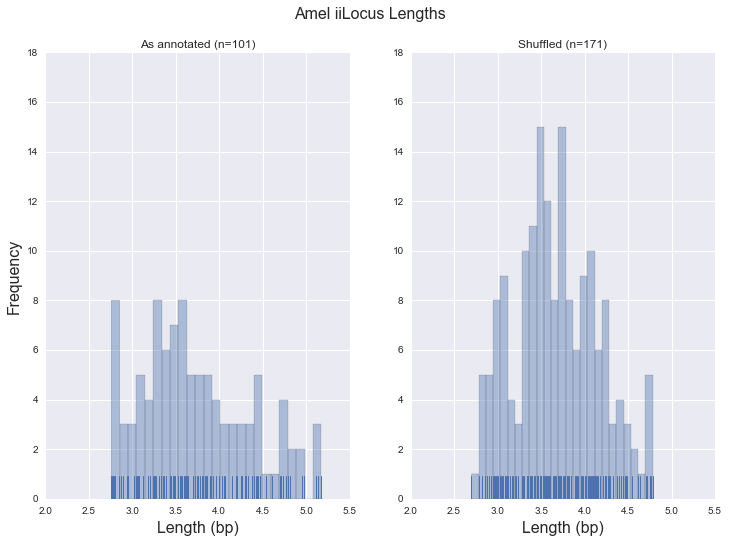

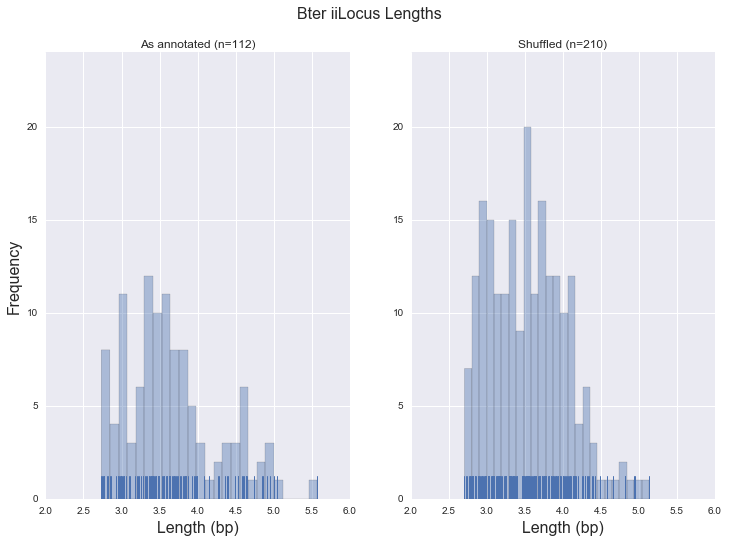

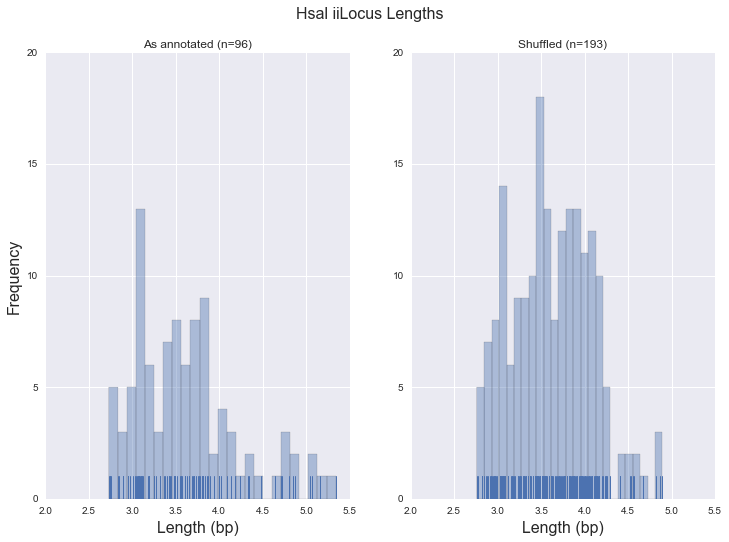

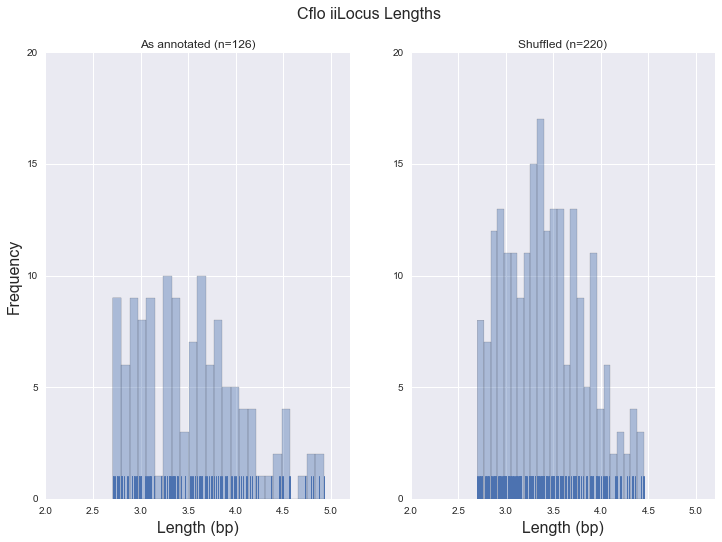

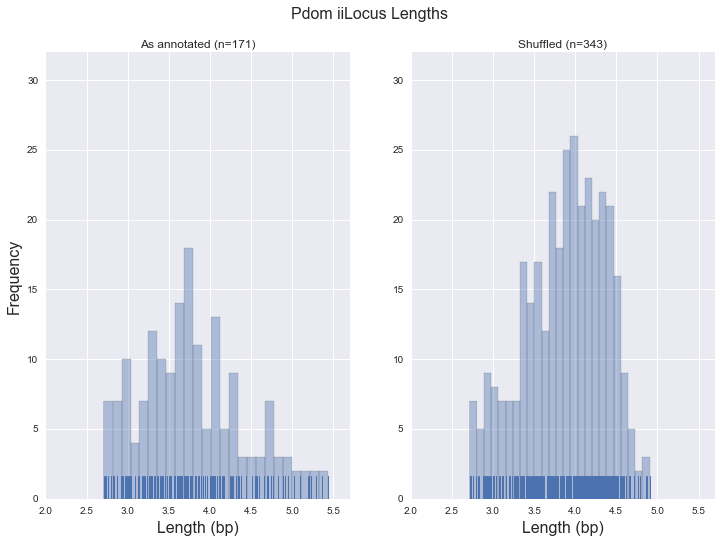

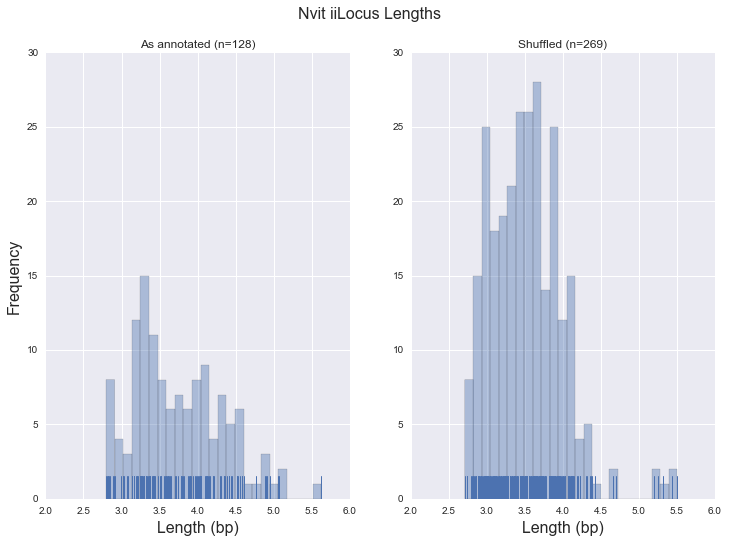

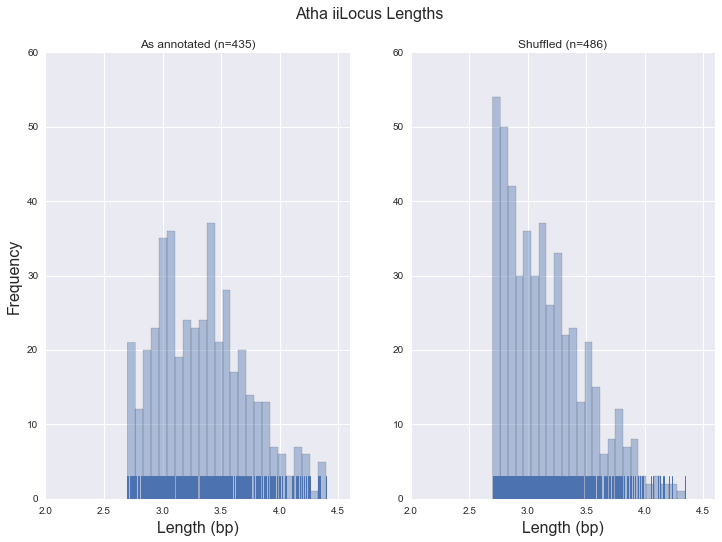

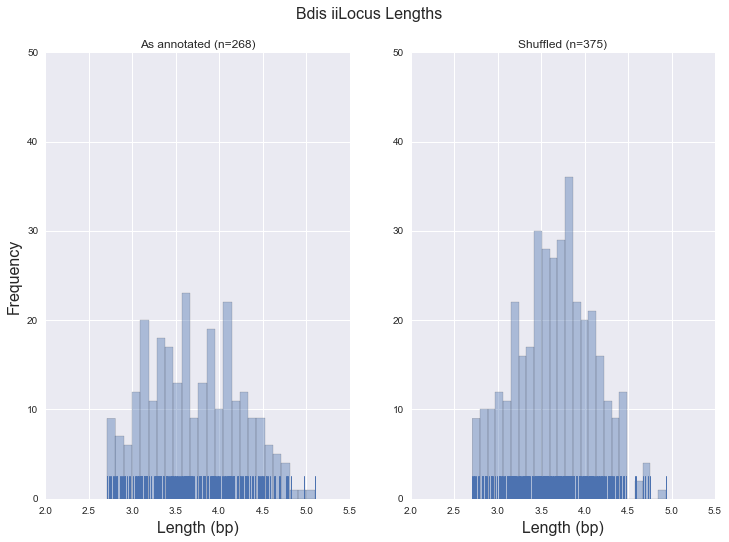

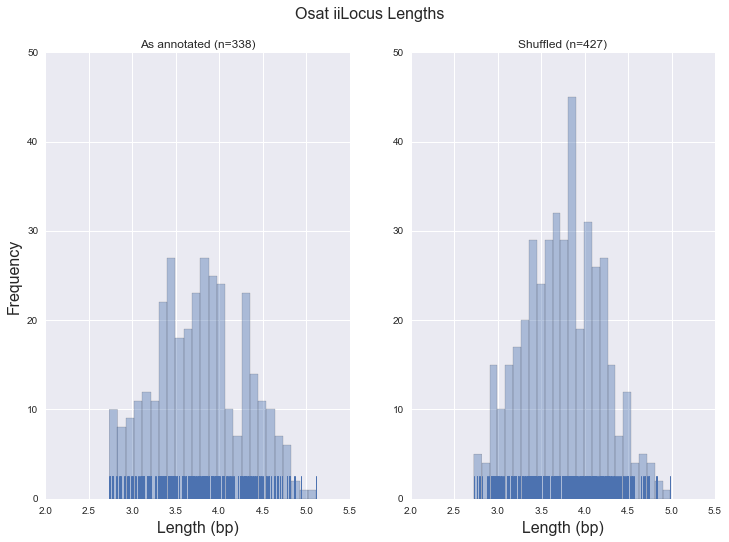

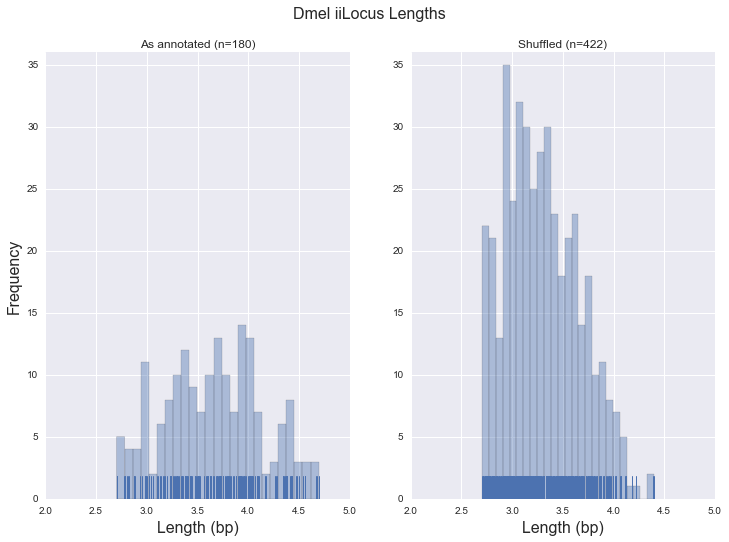

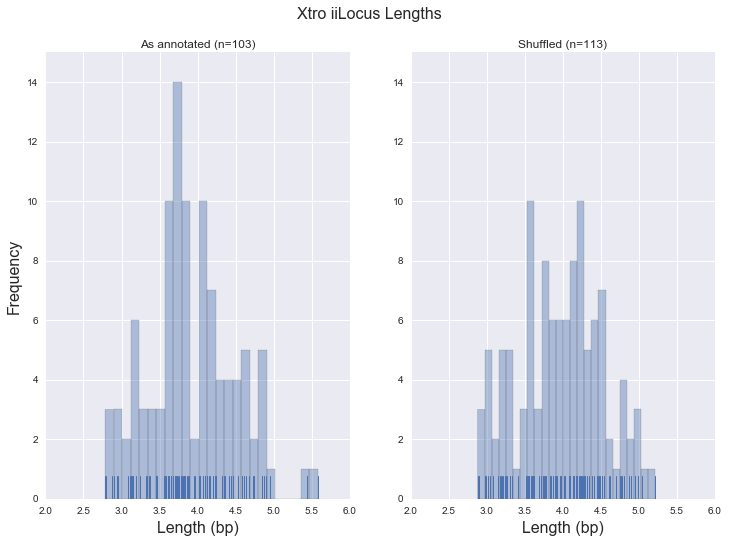

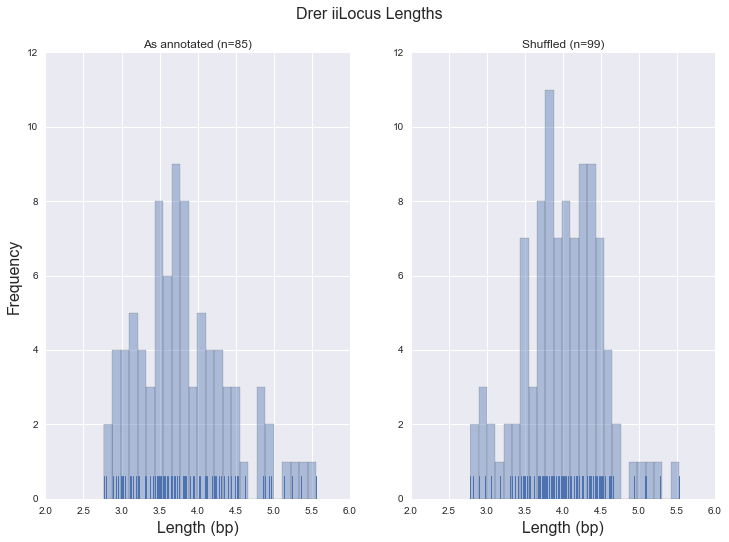

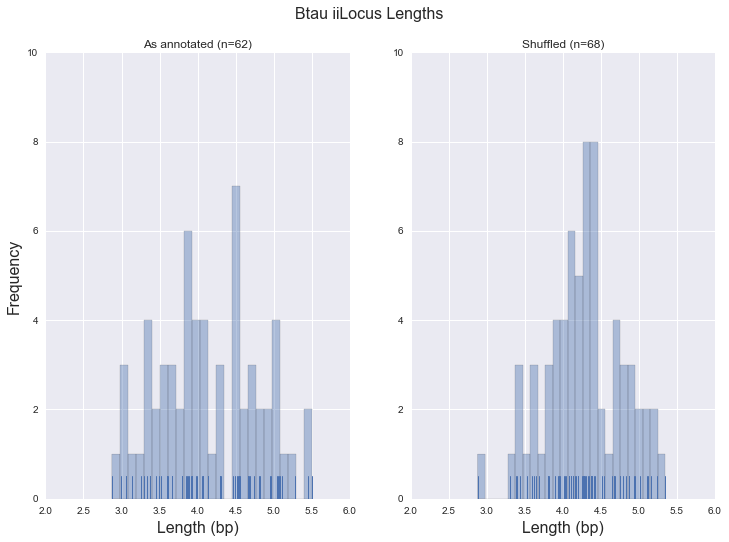

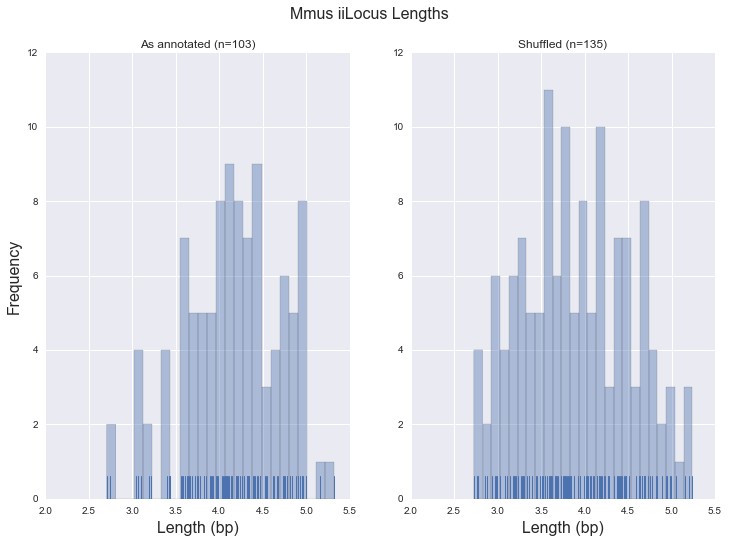

In [5]:
specdata = [('Amel', 5.5, 18), ('Bter', 6.0, 24),
            ('Hsal', 5.5, 20), ('Cflo', 5.2, 20),
            ('Pdom', 5.7, 32), ('Nvit', 6.0, 30),
            ('Atha', 4.6, 60), ('Bdis', 5.5, 50),
            ('Osat', 5.5, 50), ('Dmel', 5.0, 36),
            ('Xtro', 6.0, 15), ('Drer', 6.0, 12),
            ('Btau', 6.0, 10), ('Mmus', 5.5, 12)]
for species, xmax, ymax in specdata:
    iilocus_hist_orig_vs_shuf(species, xmax, ymax)